In [1]:
import numpy as np    # Module for numerical calculations

import matplotlib as mpl    # Module for visualisations of numerical data
import matplotlib.pyplot as plt

# Create a converter for formating of numbers in engineering style with unit Hz
eng_Hz = mpl.ticker.EngFormatter('Hz', sep=' ')

# Define some defaults for plotting
DEFAULT_colors = [
    '#004c93',
    '#ec7206',
    '#61a27c',
    '#b8103b',
    '#1a171b'
]
DEFAULT_linestyles = [
    'solid',
    (0, (5, 1)),
    (0, (3, 1, 1, 1)),
    (0, (3, 1, 1, 1, 1, 1)),
    (0, (1, 1))
]

# Define resolution of plots
PLOT_DISP_DPI = 96
PLOT_SAVE_DPI = 300

# Boolean flag to enable or disable export of figures
EXPORT_PLOT = False

In [2]:
#### Global parameter setup
# Start, stop and number of frequency points in region-of-interest (ROI)
freq_start = 1e3 #[Hz]
freq_stop = 1e9 #[Hz]
freq_N = 1001

# Create array with linearly or logarithmicaly spaced values for the frequency
# freq = np.linspace(freq_start, freq_stop, freq_N) #[Hz]
freq = np.logspace(np.log10(freq_start), np.log10(freq_stop), freq_N) #[Hz]

omega = 2.0 * np.pi * freq    # [unit rad/s] angular frequency

In [3]:
#### Ideal lowpass filter
# Defined just by cut-off frequency
f_G_idealTP = 1.5e6 #[Hz]

# Calculate voltage transfer function
H_idealTP = np.ones(len(freq))
for (freq_n, freq_point) in enumerate(freq):
    if freq_point > f_G_idealTP:
        # Truely it should be 0.0, but for dB calculation a non-zero value is better
        H_idealTP[freq_n] = 1e-100

# Calculate absolute, dB and phase of transfer function
H_idealTP_abs = np.abs( H_idealTP )
H_idealTP_dB = 20.0 * np.log10( H_idealTP_abs )

H_idealTP_phase = np.rad2deg( np.angle( H_idealTP ) )

In [4]:
#### RC lowpass filter
# Defined with R and C given, resulting in a cut-off frequency of ~1.5 MHz:
R = 1000.0 #[Ω]
C = 1.061e-10 #[H]

# Calculate exact cut-off frequency and print out value
f_G_RCTP = 1.0 / ( 2.0 * np.pi * R * C ) #[Hz]
print('f_G_RCTP = ' + eng_Hz(f_G_RCTP))

# Calculate voltage transfer function
H_RCTP = 1.0 / ( 1.0 + 1j* omega * R * C)    # Array with vlaues of the voltage transfer function at specified frequencies

# Calculate absolute, dB and phase of transfer function
H_RCTP_abs = np.abs( H_RCTP )
H_RCTP_dB = 20.0 * np.log10( H_RCTP_abs )

H_RCTP_phase = np.rad2deg( np.angle( H_RCTP ) )

f_G_RCTP = 1.50005 MHz


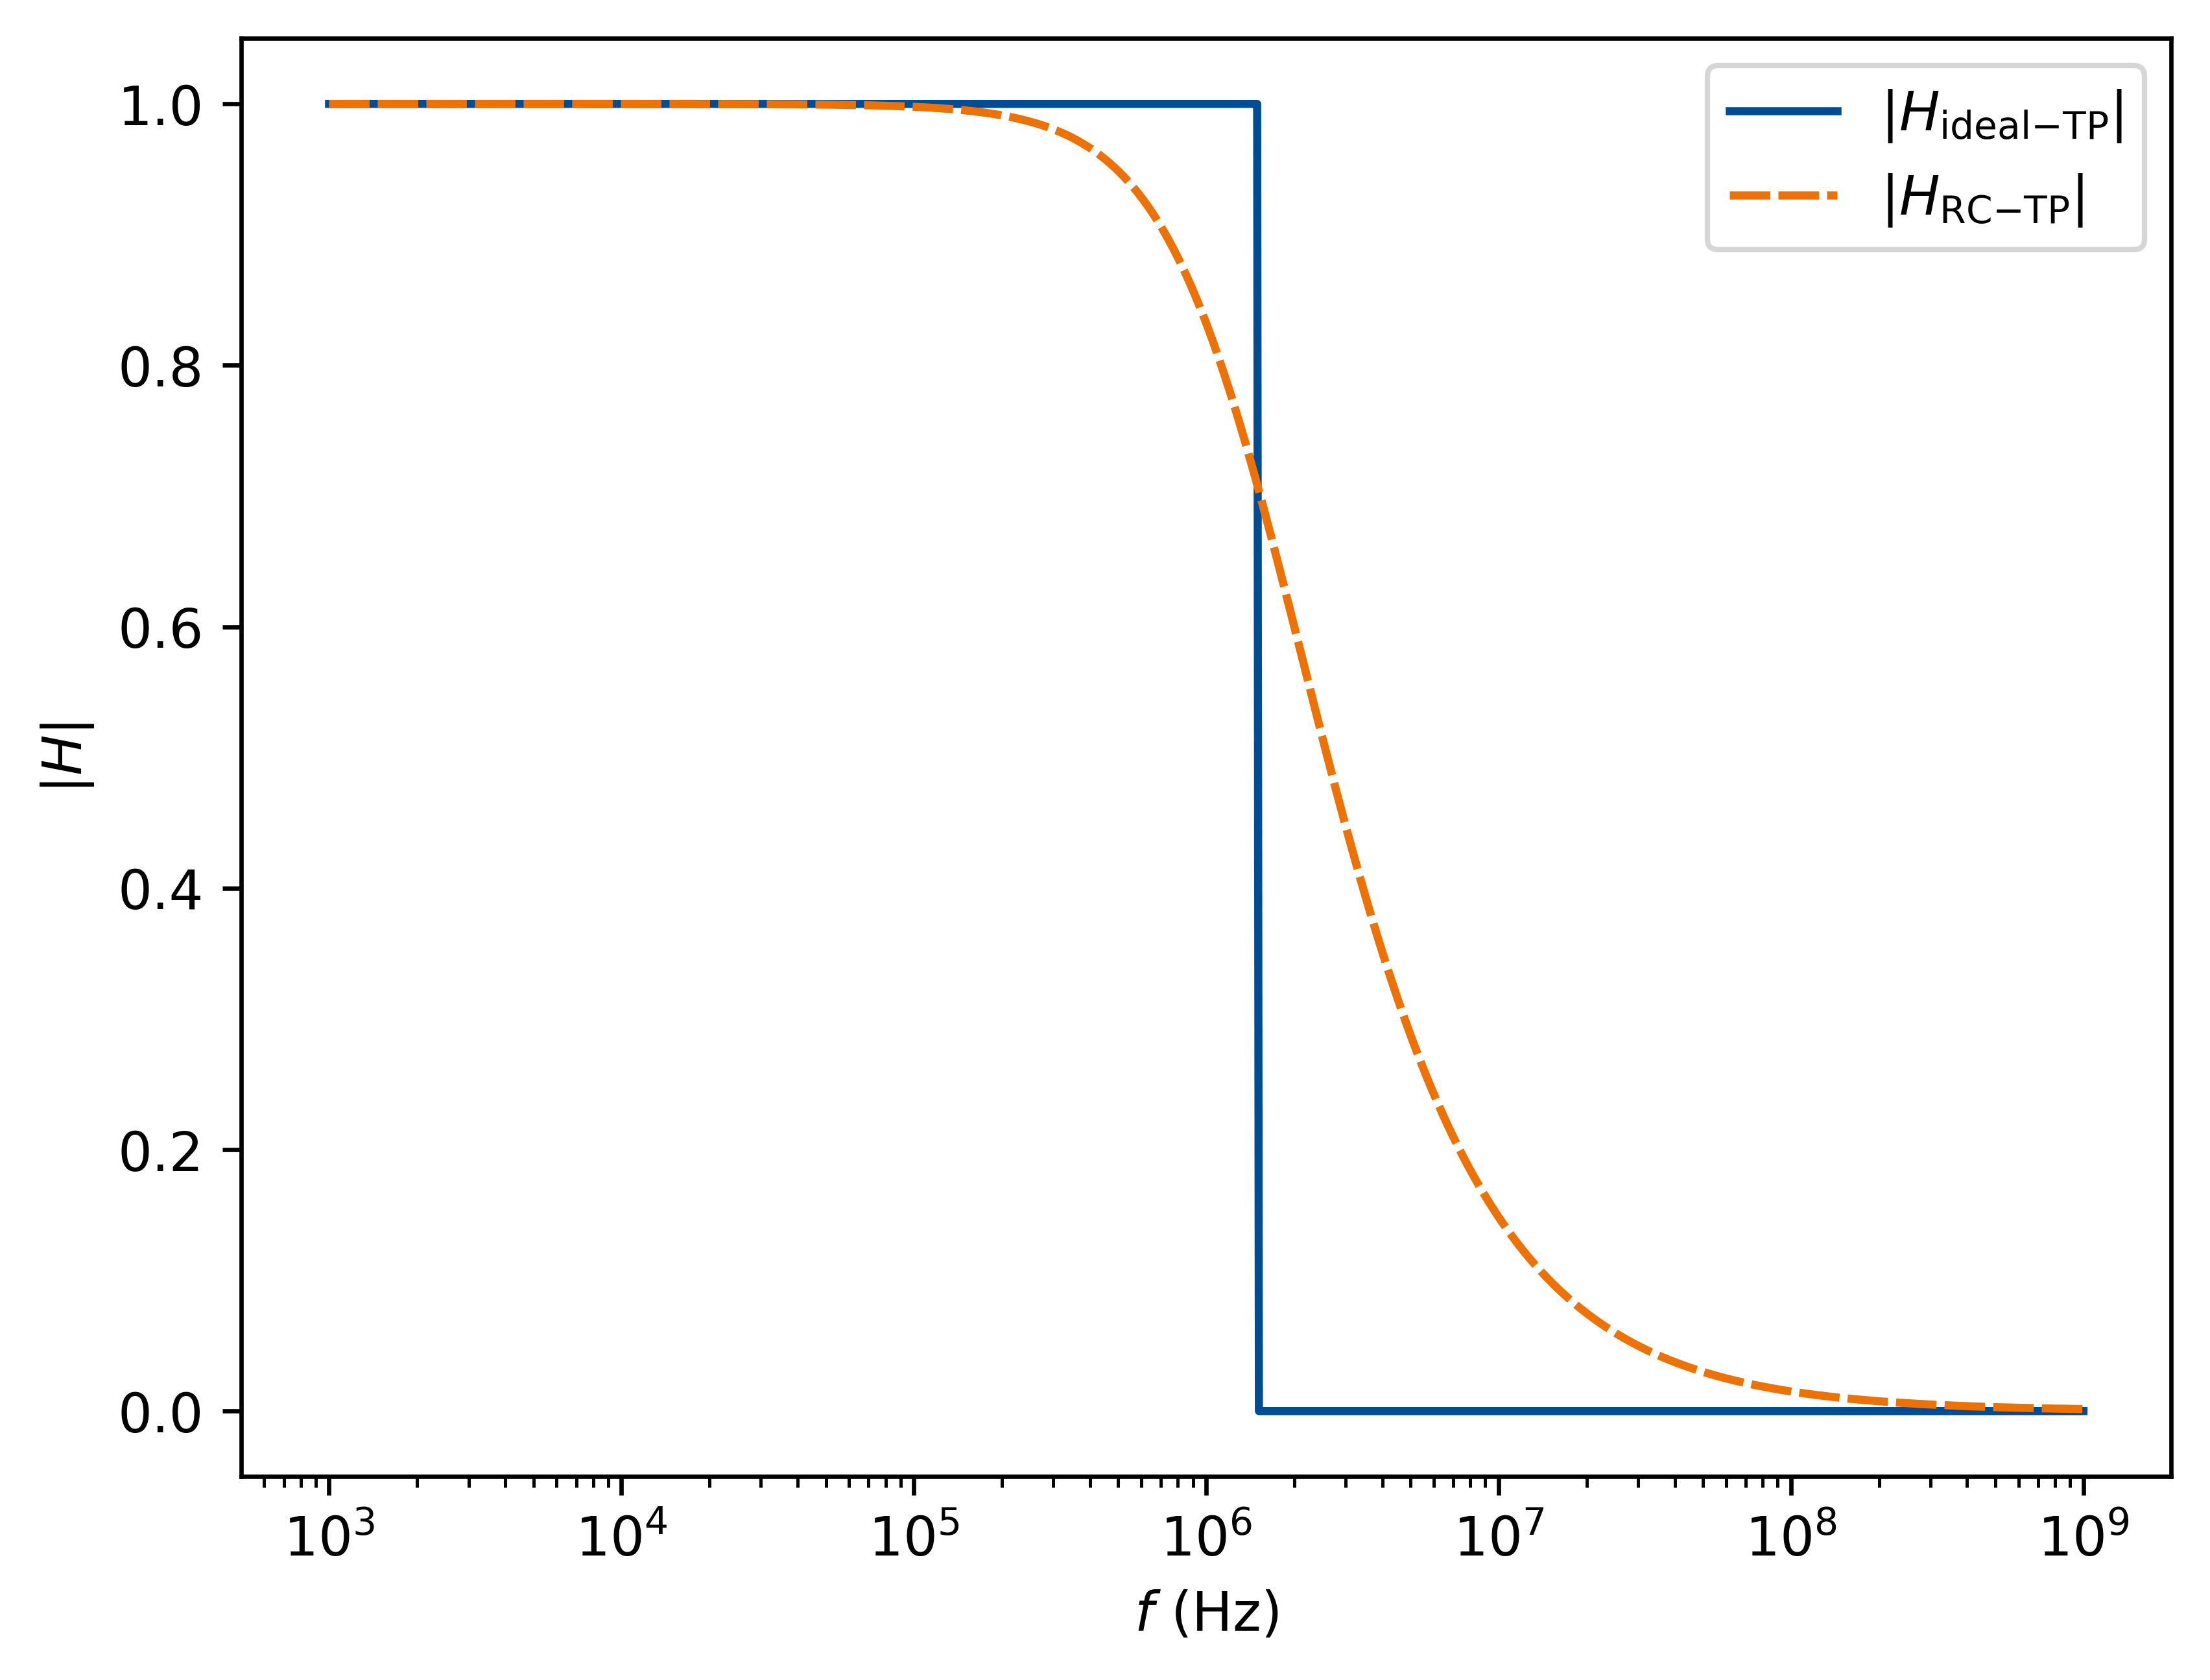

In [5]:
#### Plot the absolute of voltage transfer functions
fig, ax = plt.subplots(dpi=PLOT_DISP_DPI)

ax.set_title('')

ax.set_xlabel(r'$f~(\mathregular{Hz})$')
ax.set_xscale('log')

ax.set_ylabel(r'$|H|$')

ax.plot(freq, H_idealTP_abs,\
    label=r'$| H_\mathregular{ideal{-}TP} |$',\
    color=DEFAULT_colors[0], linestyle=DEFAULT_linestyles[0])

ax.plot(freq, H_RCTP_abs,\
    label=r'$| H_\mathregular{RC{-}TP} |$',\
    color=DEFAULT_colors[1], linestyle=DEFAULT_linestyles[1])

ax.legend()

plt.show()
if EXPORT_PLOT:
    fig.savefig('H_abs_linear.png', dpi=PLOT_SAVE_DPI)

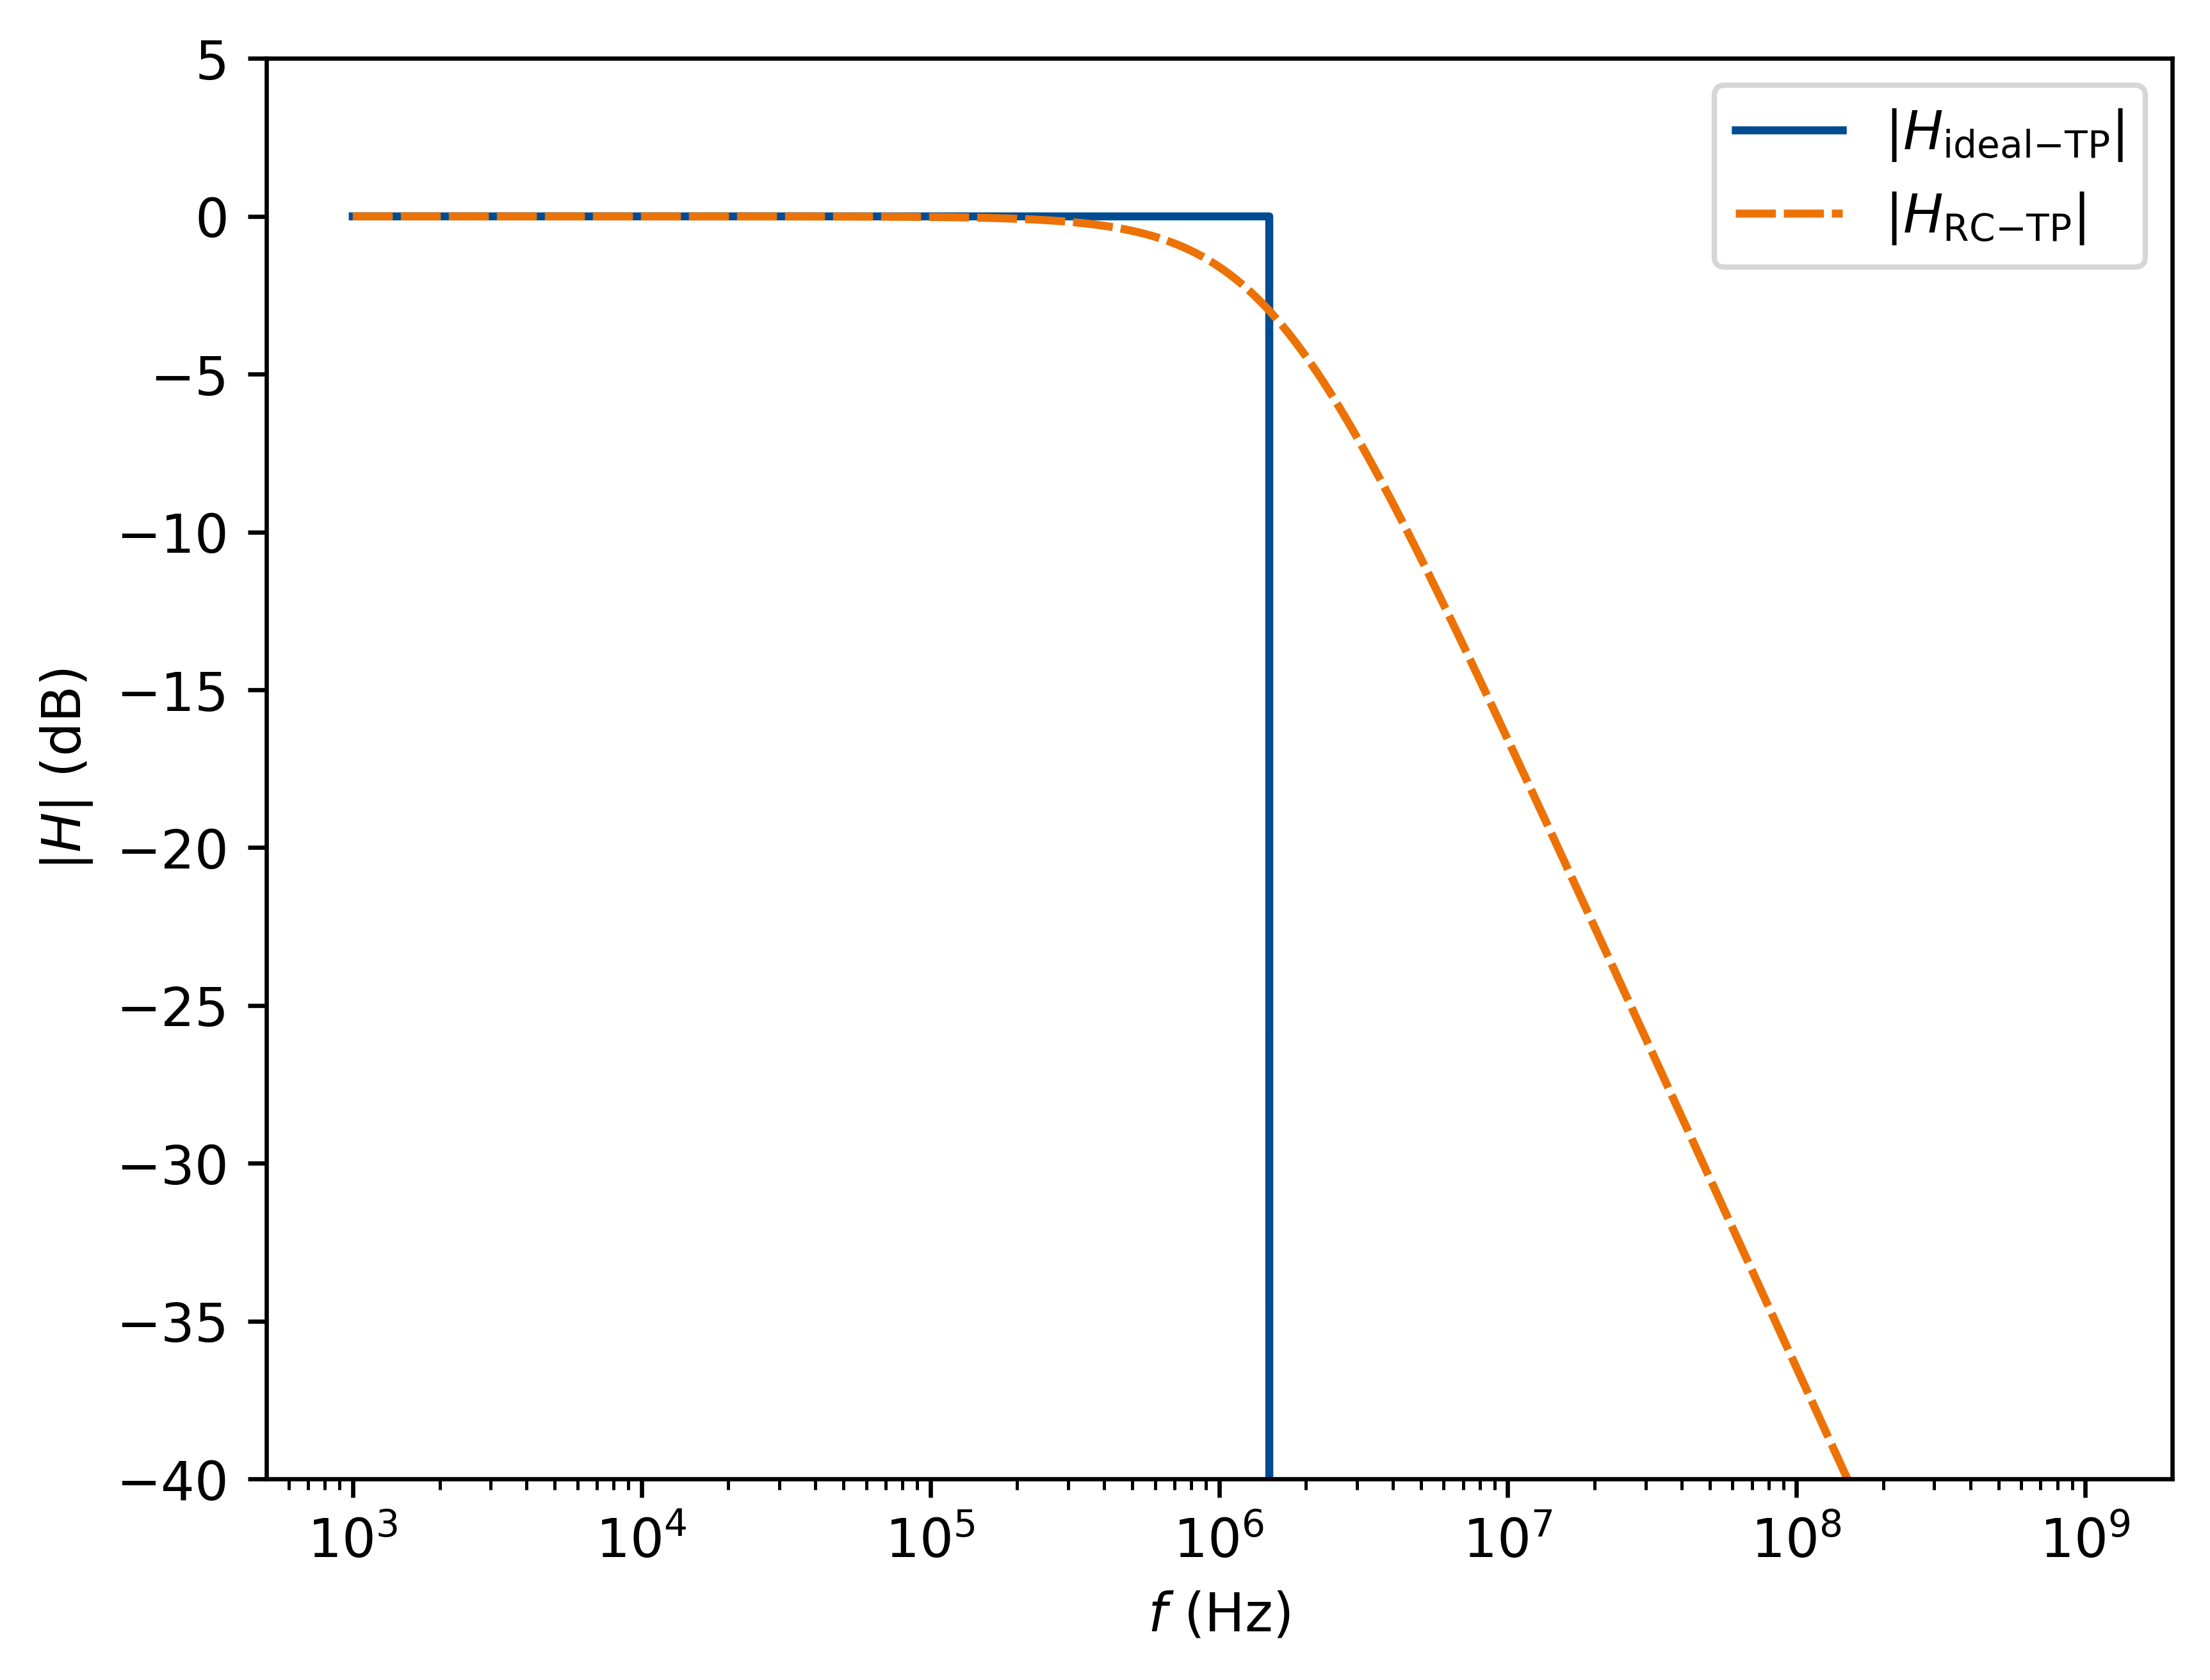

In [6]:
#### Plot (double logarithmically) the dB value of voltage transfer functions at specified frequencies
fig, ax = plt.subplots(dpi=PLOT_DISP_DPI)

ax.set_title('')

ax.set_xlabel(r'$f~(\mathregular{Hz})$')
ax.set_xscale('log')

ax.set_ylabel(r'$|H|~(\mathregular{dB})$')
ax.set_ylim([-40, 5])

ax.plot(freq, H_idealTP_dB,\
    label=r'$| H_\mathregular{ideal{-}TP} |$',\
    color=DEFAULT_colors[0], linestyle=DEFAULT_linestyles[0])

ax.plot(freq, H_RCTP_dB,\
    label=r'$| H_\mathregular{RC{-}TP} |$',\
    color=DEFAULT_colors[1], linestyle=DEFAULT_linestyles[1])

ax.legend()

plt.show()
if EXPORT_PLOT:
    fig.savefig('H_abs_dB.png', dpi=PLOT_SAVE_DPI)

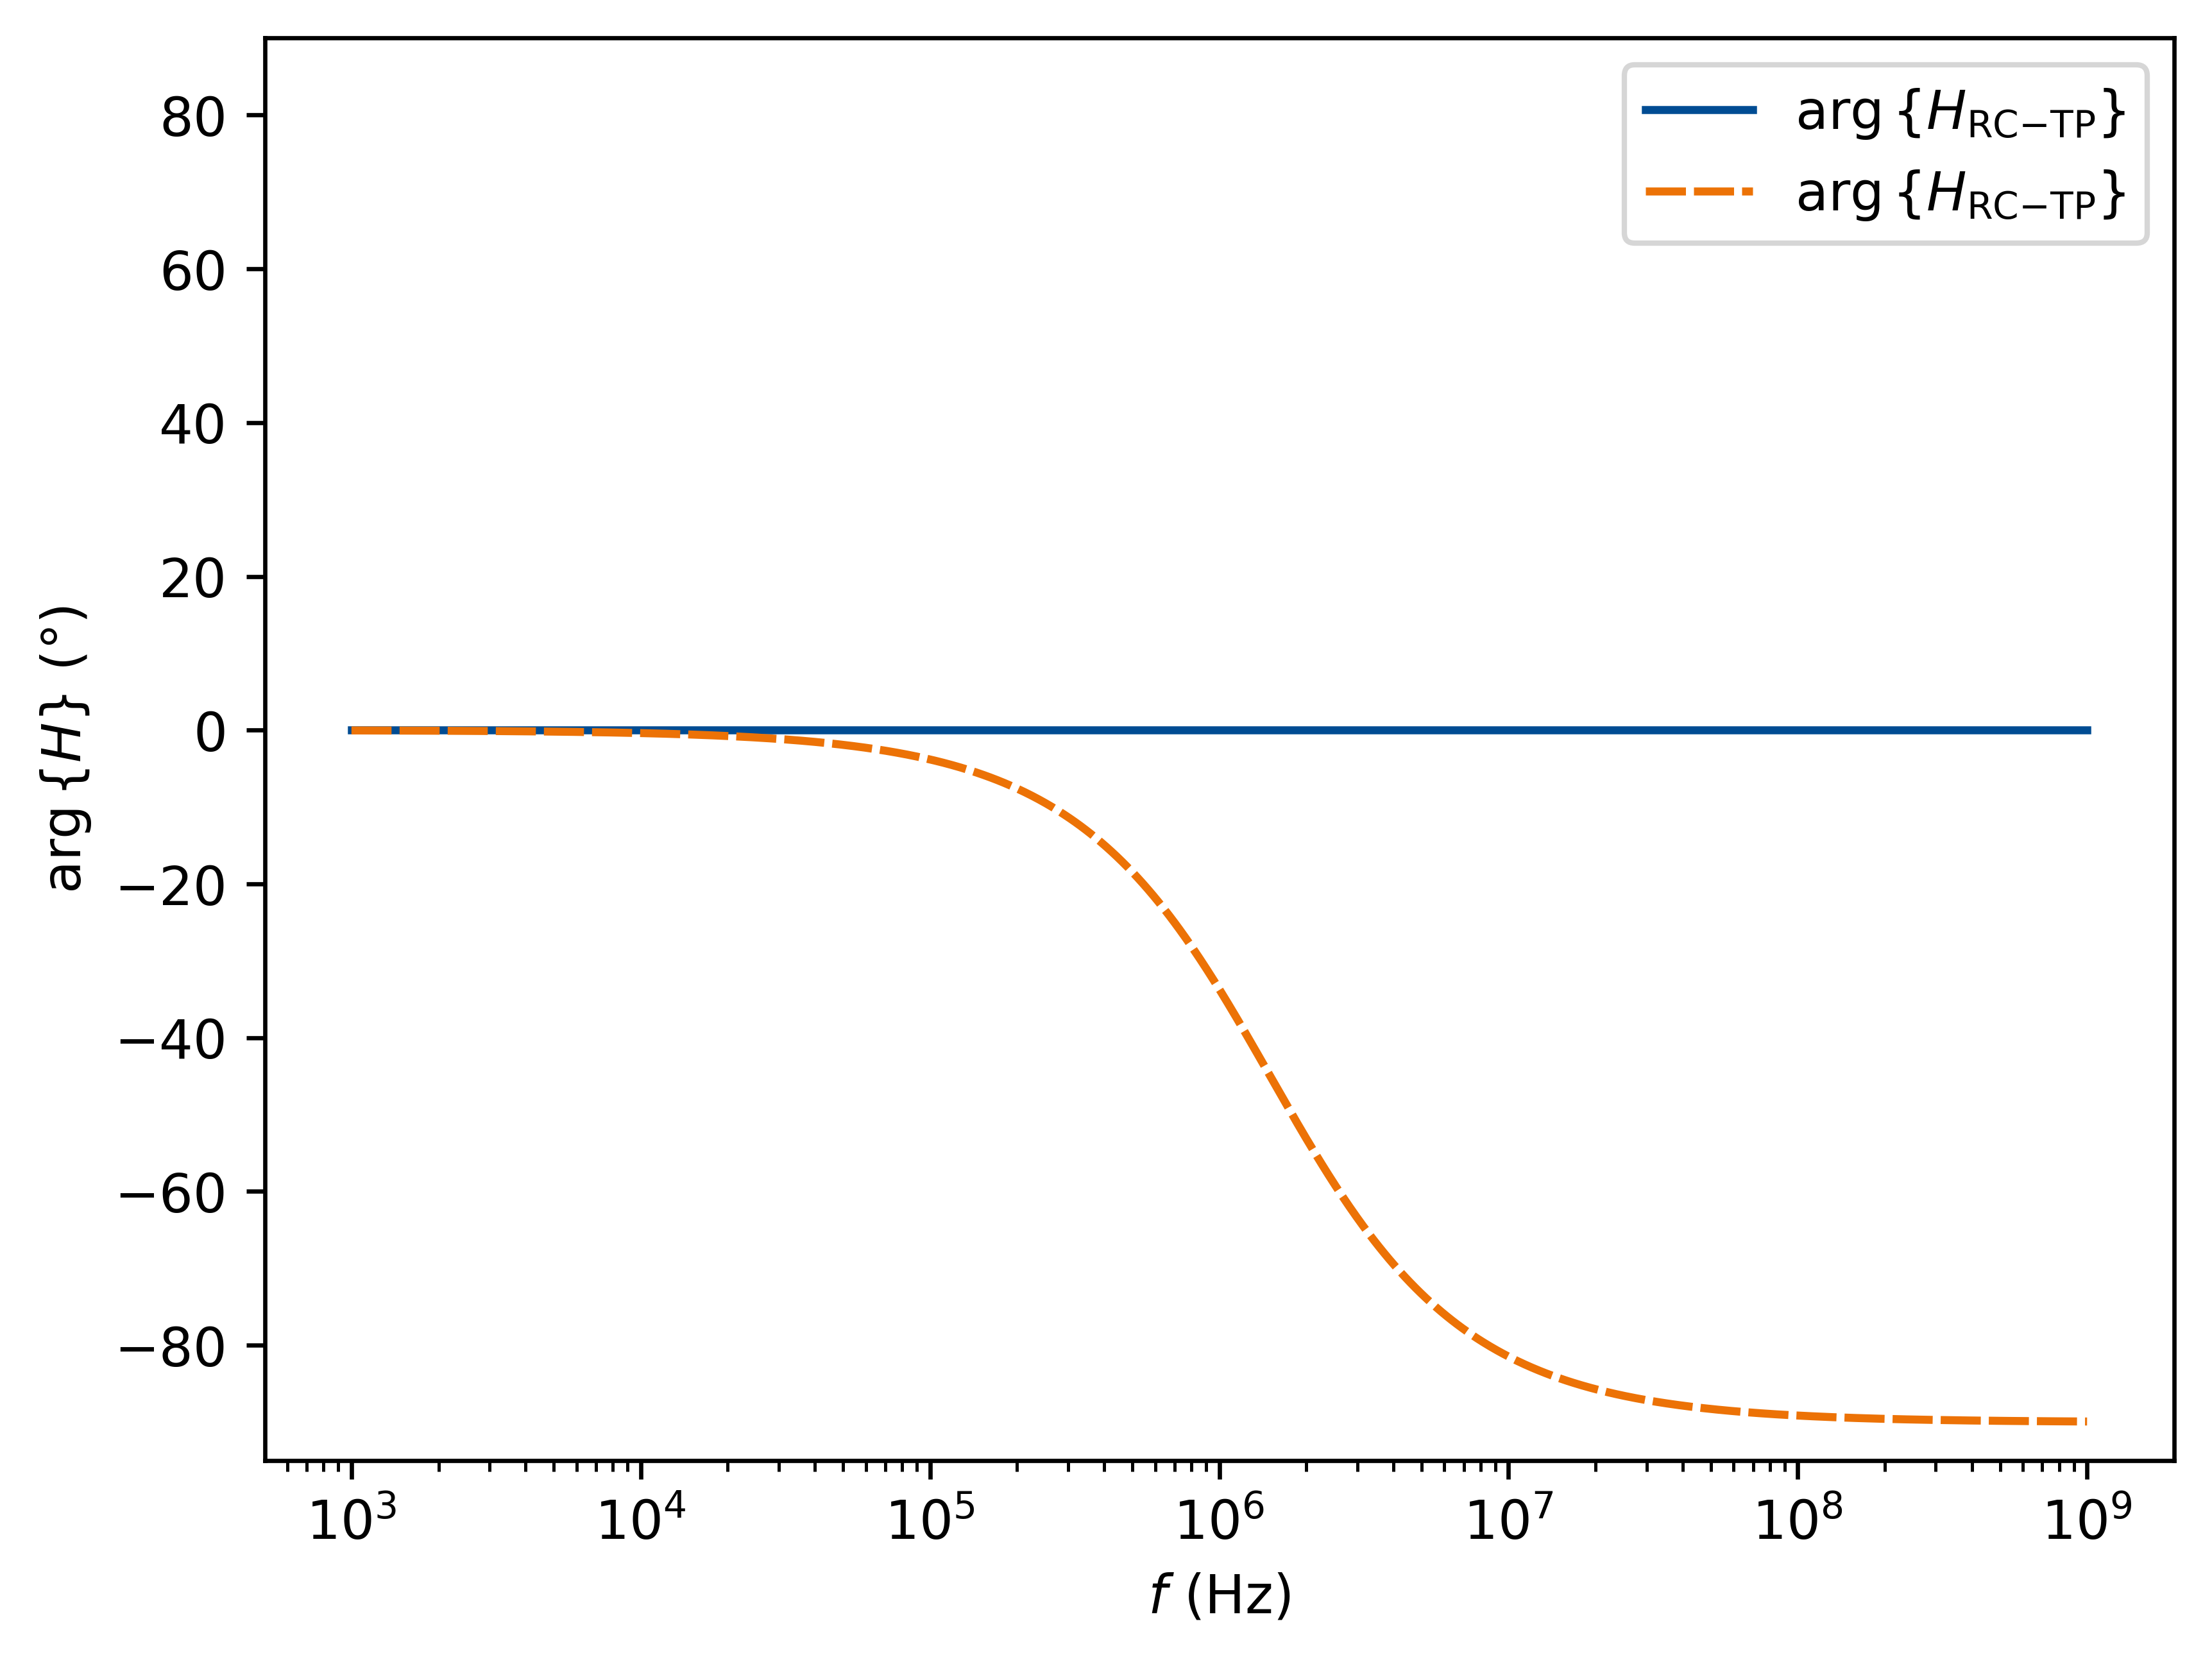

In [7]:
#### Plot (linearly) the phase of voltage transfer functions at specified frequencies
fig, ax = plt.subplots(dpi=PLOT_DISP_DPI)

ax.set_title('')

ax.set_xlabel(r'$f~(\mathregular{Hz})$')
ax.set_xscale('log')

ax.set_ylabel(r'$\arg\lbrace H \rbrace ~(°)$')
ax.set_ylim([-95, 90])
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(11, steps=[1,2,2.5,3,4.5,10]))

ax.plot(freq, H_idealTP_phase,\
    label=r'$\arg\lbrace H_\mathregular{RC{-}TP} \rbrace$',\
    color=DEFAULT_colors[0], linestyle=DEFAULT_linestyles[0])

ax.plot(freq, H_RCTP_phase,\
    label=r'$\arg\lbrace H_\mathregular{RC{-}TP} \rbrace$',\
    color=DEFAULT_colors[1], linestyle=DEFAULT_linestyles[1])

ax.legend()

plt.show()
if EXPORT_PLOT:
    fig.savefig('H_phase.png', dpi=PLOT_SAVE_DPI)